In [185]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

In [186]:
seedPoints = []

##### User Input

Asks the user for input to get the seeds.

The user must click on the objects it wants the algorithm to detect (can be more than one)

In [187]:
IMG = cv2.imread("testImg1.jpg")
T = 10.5

In [188]:
# Mouse callback functionw
def getCoords(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        seedPoints.append((x, y))
        print(f"Seed set at: ({x}, {y})")

        cv2.circle(seededImage, (x, y), 5, (0, 0, 255), -1)
        cv2.imshow("InputImage", seededImage)

# Load and display the image
seededImage = IMG.copy()
cv2.imshow("InputImage", seededImage)
cv2.setMouseCallback("InputImage", getCoords)

# Wait until any key is pressed to close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

Seed set at: (576, 132)
Seed set at: (502, 166)
Seed set at: (451, 165)
Seed set at: (526, 198)
Seed set at: (377, 202)
Seed set at: (408, 240)
Seed set at: (396, 281)
Seed set at: (445, 322)
Seed set at: (480, 313)
Seed set at: (336, 300)


Get the RGB versions of both seeded and unseeded images

In [189]:
image = cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB)
seededImage = cv2.cvtColor(seededImage, cv2.COLOR_BGR2RGB)

##### Region Growing Algorithm

In [190]:
objectImage = np.zeros_like(image)

In [191]:
for seed in seedPoints:
    current = image[seed[1], seed[0]]
    
    # Queue to explore the neighbor pixels
    toExploreQueue = [(seed[1], seed[0])]
    
    while len(toExploreQueue) > 0:
        # Get the next pixel from the queue
        y, x = toExploreQueue.pop(0)
        
        # This is just to avoid entering infinite loops by revisiting repeated pixels
        if objectImage[y, x].any() > 0:
            continue
        
        objectImage[y, x] = current
        
        # Get the neighbors of the current point (using 4-connectivity)
        # NOTE TO SELF!!!! Numpy keeps the image's shape inverted (width, height, RGB) is instead (height, width, RGB)
        neighbors = [
            (y-1, x),
            (y+1, x),
            (y, x-1),
            (y, x+1) 
        ]
        
        for ny, nx in neighbors:
            # Checks if the neighbor is a valid pixel (doesn't exceeds the image size)
            if 0 <= ny < image.shape[0] and 0 <= nx < image.shape[1]:
                # Adds more neighbors to the queue depending if the Euclidean distance is within the threshold T
                if ((current[0] - image[ny, nx][0])**2 + (current[1] - image[ny, nx][1])**2 + (current[2] - image[ny, nx][2])**2)**0.5 <= T:
                    toExploreQueue.append((ny, nx))

/tmp/ipykernel_31531/3670901742.py:30: RuntimeWarning: overflow encountered in scalar subtract
  if ((current[0] - image[ny, nx][0])**2 + (current[1] - image[ny, nx][1])**2 + (current[2] - image[ny, nx][2])**2)**0.5 <= T:
/tmp/ipykernel_31531/3670901742.py:30: RuntimeWarning: overflow encountered in scalar add
  if ((current[0] - image[ny, nx][0])**2 + (current[1] - image[ny, nx][1])**2 + (current[2] - image[ny, nx][2])**2)**0.5 <= T:


##### Results

Display the original and resulting images

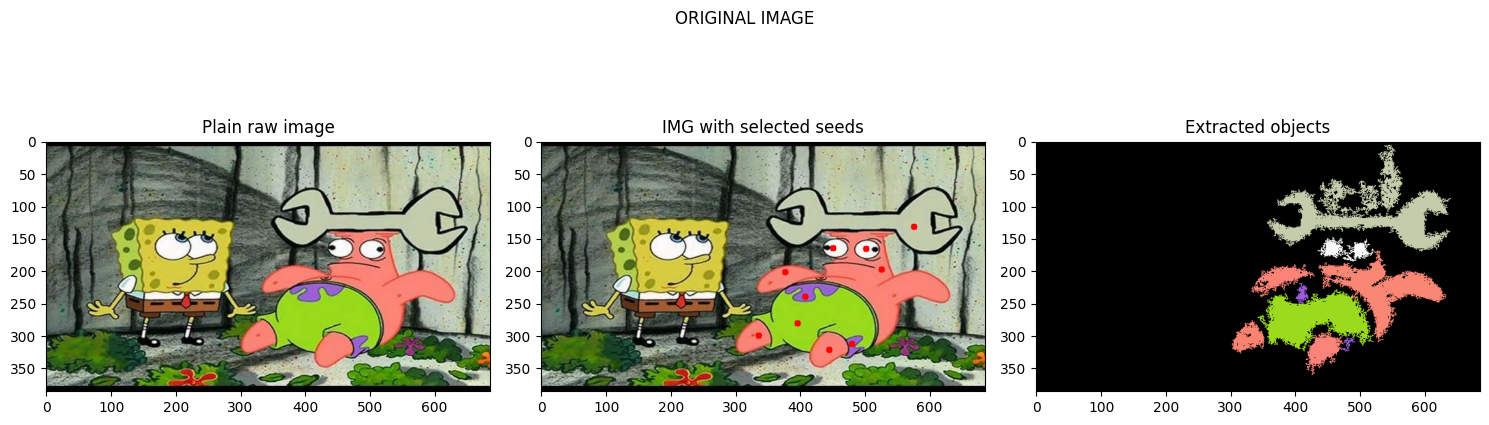

In [192]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("ORIGINAL IMAGE")

ax[0].imshow(image)
ax[0].set_title("Plain raw image")

ax[1].imshow(seededImage)
ax[1].set_title("IMG with selected seeds")

ax[2].imshow(objectImage)
ax[2].set_title("Extracted objects")

plt.tight_layout()
plt.show()